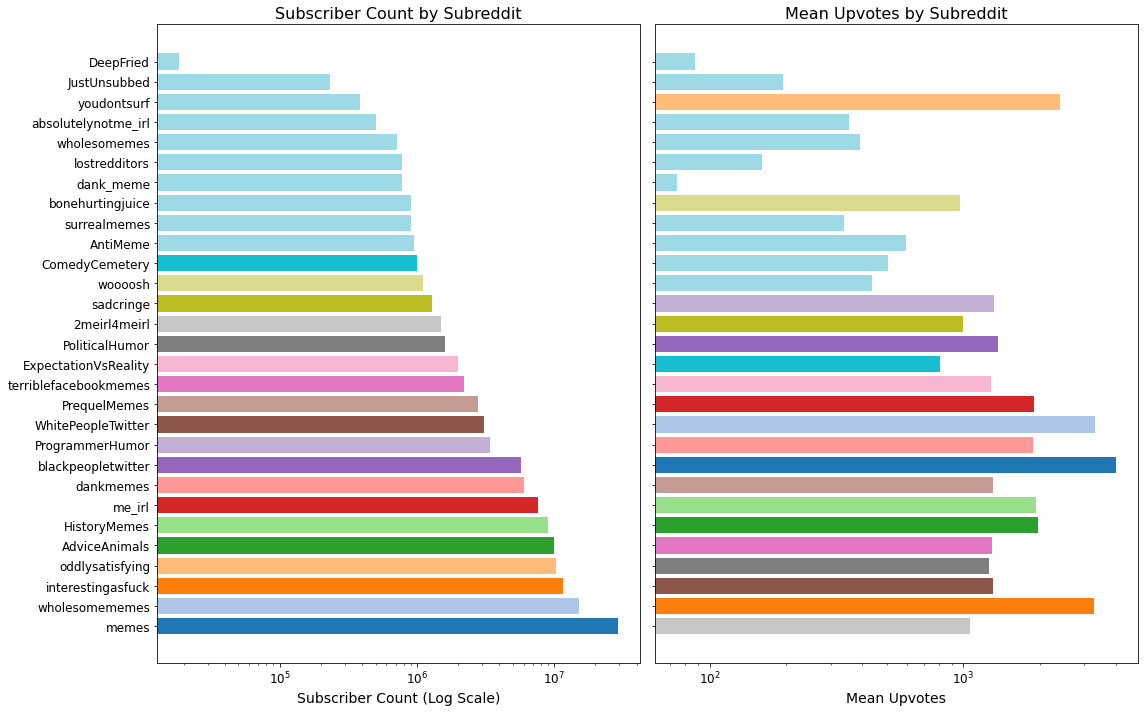

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("/data/notebook_files/aggregated_subreddits_upvotes_sorted_add.csv")

# Sort data for both metrics
df_subscribers = df.sort_values(by='Subscriber_Count', ascending=False)
df_upvotes = df.sort_values(by='Mean_Upvotes', ascending=False)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 10), sharey=True)

# Plot Subscriber Count
colors1 = plt.cm.tab20(range(len(df_subscribers)))
axes[0].barh(df_subscribers['Subreddit'], df_subscribers['Subscriber_Count'], color=colors1)
axes[0].set_xlabel('Subscriber Count (Log Scale)', fontsize=14)
axes[0].set_xscale('log')
axes[0].set_title('Subscriber Count by Subreddit', fontsize=16)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot Mean Upvotes
colors2 = plt.cm.tab20(range(len(df_upvotes)))
axes[1].barh(df_upvotes['Subreddit'], df_upvotes['Mean_Upvotes'], color=colors2)
axes[1].set_xlabel('Mean Upvotes', fontsize=14)
axes[1].set_xscale('log')
axes[1].set_title('Mean Upvotes by Subreddit', fontsize=16)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

fig.tight_layout()

plt.savefig('combined_graph_subscriber_upvotes.jpeg', dpi=300, bbox_inches='tight')

plt.show()

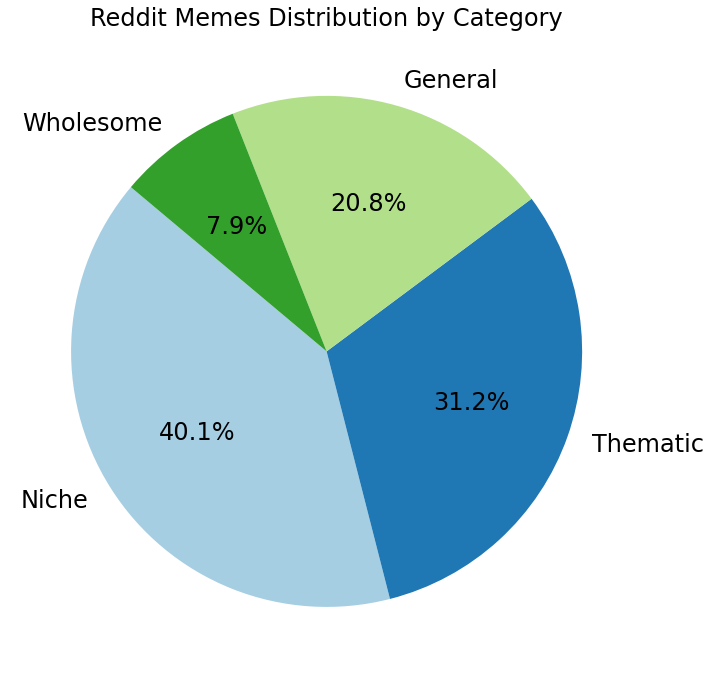

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/data/notebook_files/memes_metadata .csv")


category_mapping = {
    'dankmemes': 'General',
    'me_irl': 'General',
    '2meirl4meirl': 'General',
    'AdviceAnimals': 'General',
    'memes': 'General',
    'ProgrammerHumor': 'General',
    'HistoryMemes': 'Thematic',
    'PoliticalHumor': 'Thematic',
    'terriblefacebookmemes': 'Thematic',
    'PrequelMemes': 'Thematic',
    'ExpectationVsReality': 'Thematic',
    'WhitePeopleTwitter': 'Thematic',
    'blackpeopletwitter': 'Thematic',
    'youdontsurf': 'Thematic',  
    'wholesomememes': 'Wholesome',
    'wholesomemes': 'Wholesome',
    'surrealmemes': 'Niche',
    'bonehurtingjuice': 'Niche',
    'DeepFried': 'Niche',
    'JustUnsubbed': 'Niche',
    'AntiMeme': 'Niche',
    'woooosh': 'Niche',
    'lostredditors': 'Niche',
    'interestingasfuck': 'Niche',
    'sadcringe': 'Niche',
    'absolutelynotme_irl': 'Niche',
    'dank_meme': 'Niche',
    'oddlysatisfying': 'Niche',
    'ComedyCemetery': 'Niche',  
}


df['Category'] = df['Subreddit'].map(category_mapping)

df = df.dropna(subset=['Category'])

category_counts = df['Category'].value_counts()

total_posts = category_counts.sum()
category_percentages = (category_counts / total_posts) * 100

category_percentages = category_percentages.round(1)

difference = 100 - category_percentages.sum()
if difference != 0:
    largest_category = category_percentages.idxmax()
    category_percentages[largest_category] += difference


plt.figure(figsize=(10, 10))  
wedges, texts, autotexts = plt.pie(
    category_percentages,
    labels=category_percentages.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 24} 
)

for autotext in autotexts:
    autotext.set_fontsize(24) 
    autotext.set_color('black')  

plt.title('Reddit Memes Distribution by Category', fontsize=24)

plt.tight_layout()

plt.savefig('thematic_distribution_pie_chart_updated.jpeg', dpi=300)

plt.show()

In [5]:
category_percentages

Niche 40.044809
Thematic 31.200991
General 20.841931
Wholesome 7.912269
Name: Category, dtype: float64

In [ ]:
import pandas as pd
import numpy as np

file_path = "/data/notebook_files/metadata_with_features.csv"  # Update with the correct file path

df_10 = pd.read_csv(file_path)

total_rows = len(df_10)

if 'Normalized_Upvotes' not in df_10.columns:
    raise ValueError("'Normalized_Upvotes' column not found in the dataset.")

count_1_percent = round(total_rows * 0.01)

sorted_df = df_10.sort_values(by='Normalized_Upvotes', ascending=True)

bottom_1_percent = sorted_df.head(count_1_percent)
top_1_percent = sorted_df.tail(count_1_percent)

filtered_data = pd.concat([bottom_1_percent, top_1_percent])

filtered_data['Percentile_Category'] = ['Bottom 1%'] * len(bottom_1_percent) + ['Top 1%'] * len(top_1_percent)

filtered_data.to_csv("/data/notebook_files/top_bottom_1_percentile.csv", index=False)  # Save filtered data to a new file

print(f"Total Rows: {total_rows}")
print(f"1% Count: {count_1_percent}")
print("Filtered data saved to /data/notebook_files/top_bottom_1_percentile.csv")

In [ ]:
import pandas as pd

file_path = "/data/notebook_files/metadata_with_features.csv" 
df_10 = pd.read_csv(file_path)

df_10['viral_check'] = df_10['Ventile'].apply(lambda x: 0 if x in [1, 2] else (1 if x in [19, 20] else None))


df_10 = df_10[df_10['viral_check'].isin([0, 1])]
df_10.to_csv("filtered_meme_metadata.csv", index=False)

print(df_10.head())
print(len(df_10))

In [ ]:
import pandas as pd

filtered_df = pd.read_csv("/data/notebook_files/subscriber_count.csv")

fd_add = pd.read_csv("/data/notebook_files/metadata_with_features.csv")

aggregated_fd = fd_add.groupby('Subreddit').agg(
    Total_Upvotes=('Upvotes', 'sum'),
    Mean_Upvotes=('Upvotes', 'mean'),
    Total_Normalized_Upvotes=('Normalized_Upvotes', 'sum'),
    Mean_Normalized_Upvotes=('Normalized_Upvotes', 'mean')
).reset_index()

aggregated_fd['Mean_Upvotes'] = aggregated_fd['Mean_Upvotes'].round(2)
aggregated_fd['Mean_Normalized_Upvotes'] = aggregated_fd['Mean_Normalized_Upvotes'].round(2)

aggregated_fd = aggregated_fd.sort_values(by='Mean_Normalized_Upvotes', ascending=False)

merged_df = pd.merge(filtered_df, aggregated_fd, on='Subreddit', how='inner')

merged_df.to_csv("/data/notebook_files/merged_subreddit_data.csv", index=False)

In [3]:
df = pd.read_csv("/data/notebook_files/merged_subreddit_data.csv")  # Replace with actual path if different

In [4]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['Subscriber_Count'], df['Mean_Upvotes'])

print(f"Pearson Correlation: {corr}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant positive correlation between Subscriber_Count and Mean_Upvotes.")
else:
    print("There is no significant correlation between Subscriber_Count and Mean_Upvotes.")

Pearson Correlation: 0.31285465036473636
P-value: 0.09844388512967314
There is no significant correlation between Subscriber_Count and Mean_Upvotes.


In [5]:
from scipy.stats import spearmanr

spearman_corr, spearman_p_value = spearmanr(df['Subscriber_Count'], df['Mean_Upvotes'])
print(f"Spearman Correlation: {spearman_corr}")
print(f"Spearman P-value: {spearman_p_value}")

Spearman Correlation: 0.6507389162561574
Spearman P-value: 0.00013227708284724424


In [7]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
corr, p_value = pearsonr(df['Subscriber_Count'], df['Mean_Normalized_Upvotes'])

print(f"Pearson Correlation: {corr}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant positive correlation between Subscriber_Count and Mean_Upvotes.")
else:
    print("There is no significant correlation between Subscriber_Count and Mean_Upvotes.")

Pearson Correlation: -0.1576720592355395
P-value: 0.4140032485596428
There is no significant correlation between Subscriber_Count and Mean_Upvotes.


In [8]:
from scipy.stats import spearmanr

spearman_corr, spearman_p_value = spearmanr(df['Subscriber_Count'], df['Mean_Normalized_Upvotes'])
print(f"Spearman Correlation: {spearman_corr}")
print(f"Spearman P-value: {spearman_p_value}")

Spearman Correlation: 0.011418991265589342
Spearman P-value: 0.9531193694499656


<ipython-input-7-ffe715e0032b>:5: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_df = pd.read_csv("/data/notebook_files/metadata_with_features.csv")  # Replace with actual path if different


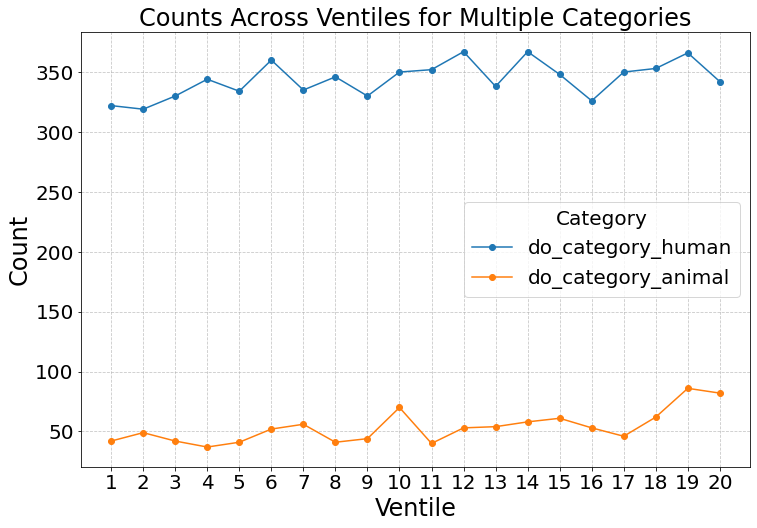

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_df = pd.read_csv("/data/notebook_files/metadata_with_features.csv")  

categories = ['do_category_human', 'do_category_animal']

plt.figure(figsize=(12, 8))

for category in categories:
    ventile_counts = filtered_df[filtered_df[category] == 1].groupby('Ventile').size().reset_index(name='Count')
    
    plt.plot(ventile_counts['Ventile'], ventile_counts['Count'], marker='o', linestyle='-', label=f'{category}')

plt.title('Counts Across Ventiles for Multiple Categories', fontsize=24)
plt.xlabel('Ventile', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.xticks(ticks=ventile_counts['Ventile'], fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='both', linestyle='--', alpha=0.7)


plt.legend(title='Category', title_fontsize=20, fontsize=20)
plt.savefig("ventile_counts_plot.jpeg", dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-11-c9ead5475f4b>:5: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df123 = pd.read_csv("/data/notebook_files/metadata_with_features.csv")


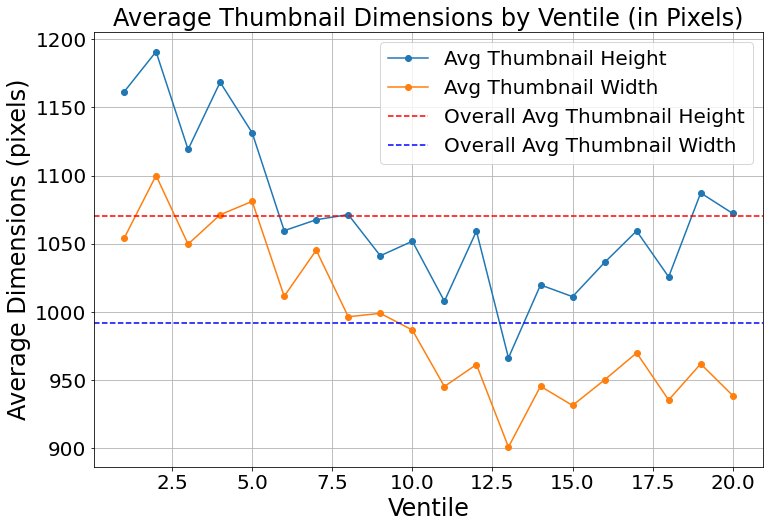

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df123 = pd.read_csv("/data/notebook_files/metadata_with_features.csv")

grouped_df = df123.groupby('Ventile').agg(
    Avg_Thumbnail_Height=('Thumbnail Height', 'mean'),
    Avg_Thumbnail_Width=('Thumbnail Width', 'mean')
).reset_index()

overall_avg_height = df123['Thumbnail Height'].mean()
overall_avg_width = df123['Thumbnail Width'].mean()

plt.figure(figsize=(12, 8))

plt.plot(grouped_df['Ventile'], grouped_df['Avg_Thumbnail_Height'], label='Avg Thumbnail Height', marker='o')

plt.plot(grouped_df['Ventile'], grouped_df['Avg_Thumbnail_Width'], label='Avg Thumbnail Width', marker='o')

plt.axhline(overall_avg_height, color='red', linestyle='--', label='Overall Avg Thumbnail Height')
plt.axhline(overall_avg_width, color='blue', linestyle='--', label='Overall Avg Thumbnail Width')

plt.title('Average Thumbnail Dimensions by Ventile (in Pixels)', fontsize=24)
plt.xlabel('Ventile', fontsize=24)
plt.ylabel('Average Dimensions (pixels)', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid()

plt.savefig("average_thumbnail_dimensions_in_pixels.jpeg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
import statsmodels.api as sm
import pandas as pd

X = viral_analyze[[  'object_count_single', 'Objects_ind', 
                      'Facial_Expression_surprise', 'do_category_human', 'Average_Saturation',
                      'Average_Value', 
                      
                      'Thumbnail Height', 'Thumbnail Width',
                      'do_category_animal',
                   
                   'title_sentiment_Positive','title_sentiment_Negative',"title_word_count","meme_text_sentiment__POSITIVE",
                   "meme_text_sentiment_NEGATIVE",

                       'call_to_action_ind','submission_text_ind',
                  "Time_12am-3am",
"Time_12pm-3pm",

"Time_3pm-6pm",

"Time_6pm-9pm",

"Time_9pm-12am"
                   
                   ]]
y = viral_analyze['viral_q']

X.fillna(X.mean(), inplace=True)

X_with_intercept = sm.add_constant(X)

def backward_elimination(X, y, significance_level=0.05):
    features = list(X.columns)
    while len(features) > 0:
        model = sm.Logit(y, X[features]).fit(disp=False)
        
        p_values = model.pvalues
        
        max_p_value = p_values.max()
        max_p_feature = p_values.idxmax()
        
        if max_p_value > significance_level:
            print(f"Removing feature '{max_p_feature}' with p-value {max_p_value:.4f}")
            features.remove(max_p_feature)
        else:
            break
    
    final_model = sm.Logit(y, X[features]).fit()
    return final_model, features

final_model, selected_features = backward_elimination(X_with_intercept, y)

print(final_model.summary())

print("\nSelected Features:")
print(selected_features)

In [ ]:
coefficients = final_model.params
p_values = final_model.pvalues
sorted_coefficients_df = pd.DataFrame({
    "Feature": coefficients.index,
    "Coefficient": coefficients.values,
    "P-Value": p_values.round(3), 
    "Absolute Magnitude": coefficients.abs().values
}).sort_values(by="Absolute Magnitude", ascending=False)

print("\nSelected Features, Sorted Coefficients, and Rounded P-Values:")
print(sorted_coefficients_df)

In [ ]:
coefficients = final_model.params.round(4)  
p_values = final_model.pvalues.round(3)    

sorted_coefficients_df = pd.DataFrame({
    "Feature": coefficients.index,
    "Coefficient": coefficients.values,
    "P-Value": p_values.values,
    "Absolute Magnitude": coefficients.abs().values
}).sort_values(by="Absolute Magnitude", ascending=False)

print("\nSelected Features, Sorted Coefficients, and Rounded P-Values:")
print(sorted_coefficients_df)